In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('C:/Users/Sven Konermann/Documents/Master/2_Semester/Applied_Data_Science/Gruppe')
df = pd.read_csv('Dax.csv', delimiter=' ', header=None, skiprows=2, names=['Datum','Eröffnung','Hoch','Tief','Schluss','Volumen'], index_col=False)
for i in range (len(df)):
    df.loc[i,'Eröffnung'] = df.loc[i,'Eröffnung'].replace('.','')
    df.loc[i,'Eröffnung'] = df.loc[i,'Eröffnung'].replace(',','.')
    df.loc[i,'Hoch'] = df.loc[i,'Hoch'].replace('.','')
    df.loc[i,'Hoch'] = df.loc[i,'Hoch'].replace(',','.')
    df.loc[i,'Tief'] = df.loc[i,'Tief'].replace('.','')
    df.loc[i,'Tief'] = df.loc[i,'Tief'].replace(',','.')
    df.loc[i,'Schluss'] = df.loc[i,'Schluss'].replace('.','')
    df.loc[i,'Schluss'] = df.loc[i,'Schluss'].replace(',','.')
    df.loc[i,'Volumen'] = df.loc[i,'Volumen'].replace('.','')
    df.loc[i,'Volumen'] = df.loc[i,'Volumen'].replace(',','.')
    i+=1
df = df.set_index('Datum')
df.head()
df.to_csv("Test.csv")
#df.info()

In [3]:
import datetime

#df['Datum'] = df['Datum'].astype(datetime.date)
df['Eröffnung'] = df['Eröffnung'].astype(float)
df['Hoch'] = df['Hoch'].astype(float)
df['Tief'] = df['Tief'].astype(float)
df['Schluss'] = df['Schluss'].astype(float)
df.head()
#df.info()
#df.shape

,Eröffnung,Hoch,Tief,Schluss,Volumen
Datum,,,,,
02.05.2002,5043.01,5066.97,4952.16,4964.56,0
03.05.2002,4958.78,5021.74,4872.19,4882.77,0
06.05.2002,4884.03,4926.78,4876.58,4880.67,0
07.05.2002,4875.35,4892.43,4773.49,4872.41,0
08.05.2002,4878.74,5028.59,4878.74,5028.59,0


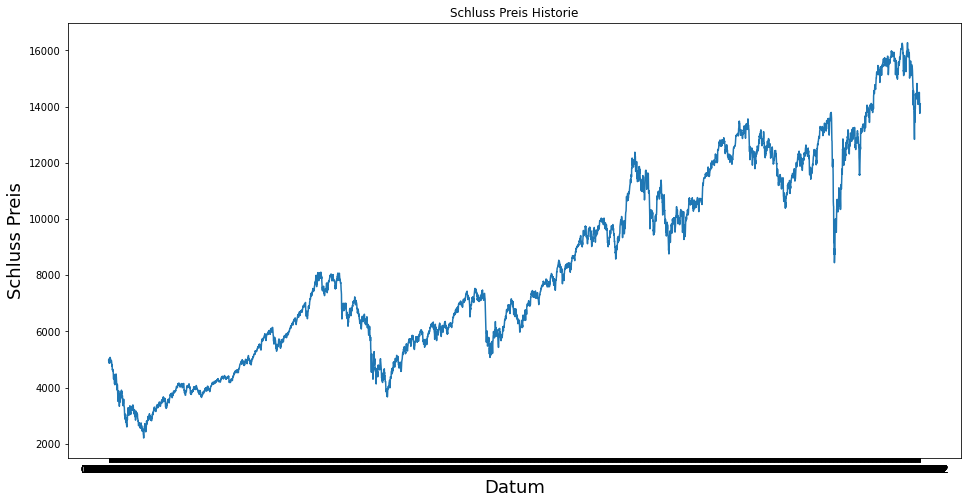

In [4]:
plt.figure(figsize=(16,8))
plt.title('Schluss Preis Historie')
plt.plot(df['Schluss'])
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Schluss Preis', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Schluss'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

4062

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.19629264],
       [0.19047907],
       [0.1903298 ],
       ...,
       [0.82387895],
       [0.8370926 ],
       [0.8454828 ]])

In [7]:
train_data = scaled_data[0:training_data_len ,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.19629264, 0.19047907, 0.1903298 , 0.18974269, 0.20084385,
       0.19642912, 0.18969222, 0.19706883, 0.20230027, 0.20395713,
       0.20218441, 0.20139969, 0.19873991, 0.19771779, 0.19308981,
       0.19024664, 0.19164193, 0.19607799, 0.19302442, 0.19041012,
       0.18189198, 0.18589658, 0.18089615, 0.1722131 , 0.17210791,
       0.17446845, 0.17110356, 0.16961658, 0.17081284, 0.16399634,
       0.16114961, 0.14932983, 0.16150216, 0.15857014, 0.15295274,
       0.14519514, 0.14425121, 0.13677438, 0.14215935, 0.13477278,
       0.14617249, 0.15492448, 0.15380498, 0.14166037, 0.13755199,
       0.14611491, 0.16206582, 0.15917289, 0.15401467, 0.14125309,
       0.13615528, 0.13702955, 0.12151365, 0.12615086, 0.13432996,
       0.13489362, 0.12004728, 0.10579943, 0.0933179 , 0.1016221 ])]
[0.09364700162558398]



In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(4002, 60, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4002/4002 [==============================] - 95s 23ms/step - loss: 5.6211e-04


In [13]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [17]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)
rmse

274.79892249076346

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.plot(train['Schluss'])
plt.plot(valid[['Schluss', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

C:\Users\Sven Konermann\AppData\Local\Temp\ipykernel_147168\3950293827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
valid